## Week 9 Assignment

Dataset Links

Housing - https://drive.google.com/file/d/15oqGGGzZx8GBSBndKvrvEqUB-hTcYV_T/view?usp=sharing

Loan - https://drive.google.com/file/d/12nV29mhooid58FGNcweMSPr6Nvnfr0M5/view?usp=sharing

<b>Part 1: Mutual Information Classification</b>

Model-based Feature Selection Project

For the model-based feature selection project, you will use the "loan" dataset

Write a Python script that performs model-based feature selection using Mutual Information Classification on the "loan" dataset.

● Load the dataset using the pandas library or any other suitable method.

● Apply necessary processing on it (Hint : label_encoding , null value handling)

● Separate the features (X) and the target variable (y : Loan_Status) from the dataset.

● Use the SelectKBest class from the sklearn.feature_selection module to select the top K features based on mutual information scores.

● Choose an appropriate value of K (number of features to select) for the analysis.

● Fit the feature selection model on the dataset and transform the feature matrix accordingly.

● Print the names or indices of the selected features.

● Note: Provide necessary code comments and explanations throughout your code.

Bonus Task (optional):

Implement a visualization technique to display the mutual information scores for each feature in
the "loan" dataset. You can use libraries like matplotlib or seaborn to create the visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [2]:
loan_data = pd.read_csv("loan.csv")

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_data.dropna(inplace = True)

In [7]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
print(f"We lost 614-480 = {614-480} rows or {((614-480)/614) * 100} % of entries.")
print(f"We still retain 480 rows or {(480/614) * 100} % of entries.")
print("Since we still have most of the data after dropping the null values, we can proceed further.")

We lost 614-480 = 134 rows or 21.824104234527688 % of entries.
We still retain 480 rows or 78.17589576547232 % of entries.
Since we still have most of the data after dropping the null values, we can proceed further.


In [9]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
loan_data.drop("Loan_ID",axis = 1,inplace=True)#Loan_ID will not have any effect on whether the loan will be accepted or not
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
loan_data.select_dtypes(include=["object"])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [12]:
categorical_columns = loan_data.select_dtypes(include=["object"]).columns
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
LE = LabelEncoder()
for column in categorical_columns:
    loan_data[column] = LE.fit_transform(loan_data[column])

In [14]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [15]:
independent_variables = list(loan_data.columns)
independent_variables.remove("Loan_Status")
independent_variables

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [16]:
dependent_variable = "Loan_Status"
dependent_variable

'Loan_Status'

In [17]:
X = loan_data[independent_variables]
y = loan_data[dependent_variable]

In [52]:
k=4
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)
selected_features

array([ 0,  1,  9, 10], dtype=int64)

In [53]:
selected_feature_names = [X.columns[index] for index in selected_features]
print("Selected Features: ",selected_feature_names)
individual_scores = selector.scores_[selected_features]
print("Individual scores:", individual_scores)

Selected Features:  ['Gender', 'Married', 'Credit_History', 'Property_Area']
Individual scores: [0.02820797 0.01942822 0.13934654 0.0177781 ]


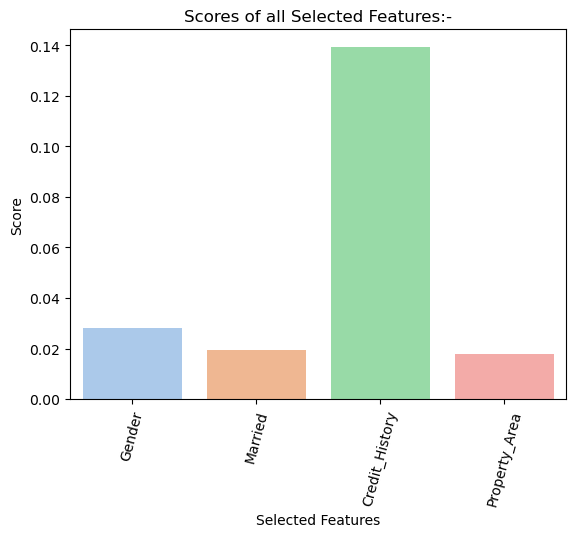

In [54]:
sns.barplot(x=np.array(selected_feature_names),y=np.array(individual_scores),hue = np.array(selected_feature_names),palette="pastel")
plt.xlabel("Selected Features")
plt.ylabel("Score")
plt.title("Scores of all Selected Features:-")
plt.xticks(rotation=75)
plt.show()

<b>Part 2: Mutual Information Regression</b>

Model-based Feature Selection Project

For the model-based feature selection project, you will use the "Housing.csv" dataset

Write a Python script that performs model-based feature selection using Mutual Information Regression on the "Housing" dataset.

● Load the dataset using the pandas library or any other suitable method.

● Apply necessary processing on it (Hint : label_encoding , null value handling)

● Separate the features (X) and the target variable (y : Price of the house) from the dataset.

● Use the SelectKBest class from the sklearn.feature_selection module to select the top K features based on mutual information scores.

● Choose an appropriate value of K (number of features to select) for the analysis.

● Fit the feature selection model on the dataset and transform the feature matrix accordingly.

● Print the names or indices of the selected features.

● Note: Provide necessary code comments and explanations throughout your code.

Bonus Task (optional):

Implement a visualization technique to display the mutual information scores for each feature inthe "Housing" dataset. You can use libraries like matplotlib or seaborn to create the
visualization.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [104]:
housing_data = pd.read_csv("housing.csv")

In [105]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [106]:
housing_data.shape

(1460, 81)

In [107]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [108]:
housing_data.dropna(inplace=True)
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [109]:
#Dropping all the null values seems to remove all the rows
#Have to handle this in a per column basis first

In [110]:
#Loading the .csv file again
housing_data = pd.read_csv("housing.csv")

In [111]:
null_info = housing_data.isnull().sum()
null_info

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [112]:
for column in null_info.index:
    if null_info[column] > 0:
        print("Column:",column,"=",null_info[column])

Column: LotFrontage = 259
Column: Alley = 1369
Column: MasVnrType = 872
Column: MasVnrArea = 8
Column: BsmtQual = 37
Column: BsmtCond = 37
Column: BsmtExposure = 38
Column: BsmtFinType1 = 37
Column: BsmtFinType2 = 38
Column: Electrical = 1
Column: FireplaceQu = 690
Column: GarageType = 81
Column: GarageYrBlt = 81
Column: GarageFinish = 81
Column: GarageQual = 81
Column: GarageCond = 81
Column: PoolQC = 1453
Column: Fence = 1179
Column: MiscFeature = 1406


In [113]:
columns_with_null_values=[]
for column in null_info.index:
    if null_info[column] > 0:
        columns_with_null_values.append(column)
columns_with_null_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [114]:
threshold = 0.4 # 40% in percentage
columns_to_be_dropped=[]
for column in columns_with_null_values:
    if housing_data[column].isnull().sum()/housing_data.shape[0] >= threshold:
        columns_to_be_dropped.append(column)
columns_to_be_dropped

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [115]:
housing_data.drop(columns_to_be_dropped,axis=1,inplace=True)
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [116]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [117]:
housing_data.dropna(inplace=True)
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [118]:
housing_data.drop("Id",axis=1,inplace=True) #Id column is not useful for understanding Trends in the SalePrice column
housing_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [120]:
housing_data.select_dtypes(include=["object"])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [121]:
categorical_columns = housing_data.select_dtypes(include=["object"]).columns
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [122]:
LE = LabelEncoder()
for column in categorical_columns:
    housing_data[column] = LE.fit_transform(housing_data[column])

In [123]:
housing_data[categorical_columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,5,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,5,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,5,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,5,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,5,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,5,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,5,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,5,1,2,4,4,2,8,4


In [124]:
independent_variables = list(housing_data.columns)
independent_variables.remove("SalePrice")
independent_variables

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch'

In [125]:
dependent_variable = "SalePrice"
dependent_variable

'SalePrice'

In [127]:
X = housing_data[independent_variables]
y = housing_data[dependent_variable]

In [144]:
k=12
selector = SelectKBest(mutual_info_regression, k=k)
selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)
selected_features

array([10, 15, 17, 24, 27, 35, 40, 43, 50, 55, 57, 58], dtype=int64)

In [145]:
selected_feature_names = [X.columns[index] for index in selected_features]
individual_scores = selector.scores_[selected_features]

for name,score in zip(selected_feature_names,individual_scores):
    print("Selected Feature: ",name,", Individual score: ", score)

Selected Feature:  Neighborhood , Individual score:  0.5210222525913224
Selected Feature:  OverallQual , Individual score:  0.5738571230997196
Selected Feature:  YearBuilt , Individual score:  0.40447320670169207
Selected Feature:  ExterQual , Individual score:  0.3687852634301496
Selected Feature:  BsmtQual , Individual score:  0.37294810701894443
Selected Feature:  TotalBsmtSF , Individual score:  0.3883433688419675
Selected Feature:  1stFlrSF , Individual score:  0.3425493594450031
Selected Feature:  GrLivArea , Individual score:  0.487989664651169
Selected Feature:  KitchenQual , Individual score:  0.3450172789085322
Selected Feature:  GarageYrBlt , Individual score:  0.3064956583520386
Selected Feature:  GarageCars , Individual score:  0.3642873133613034
Selected Feature:  GarageArea , Individual score:  0.32653751668004327


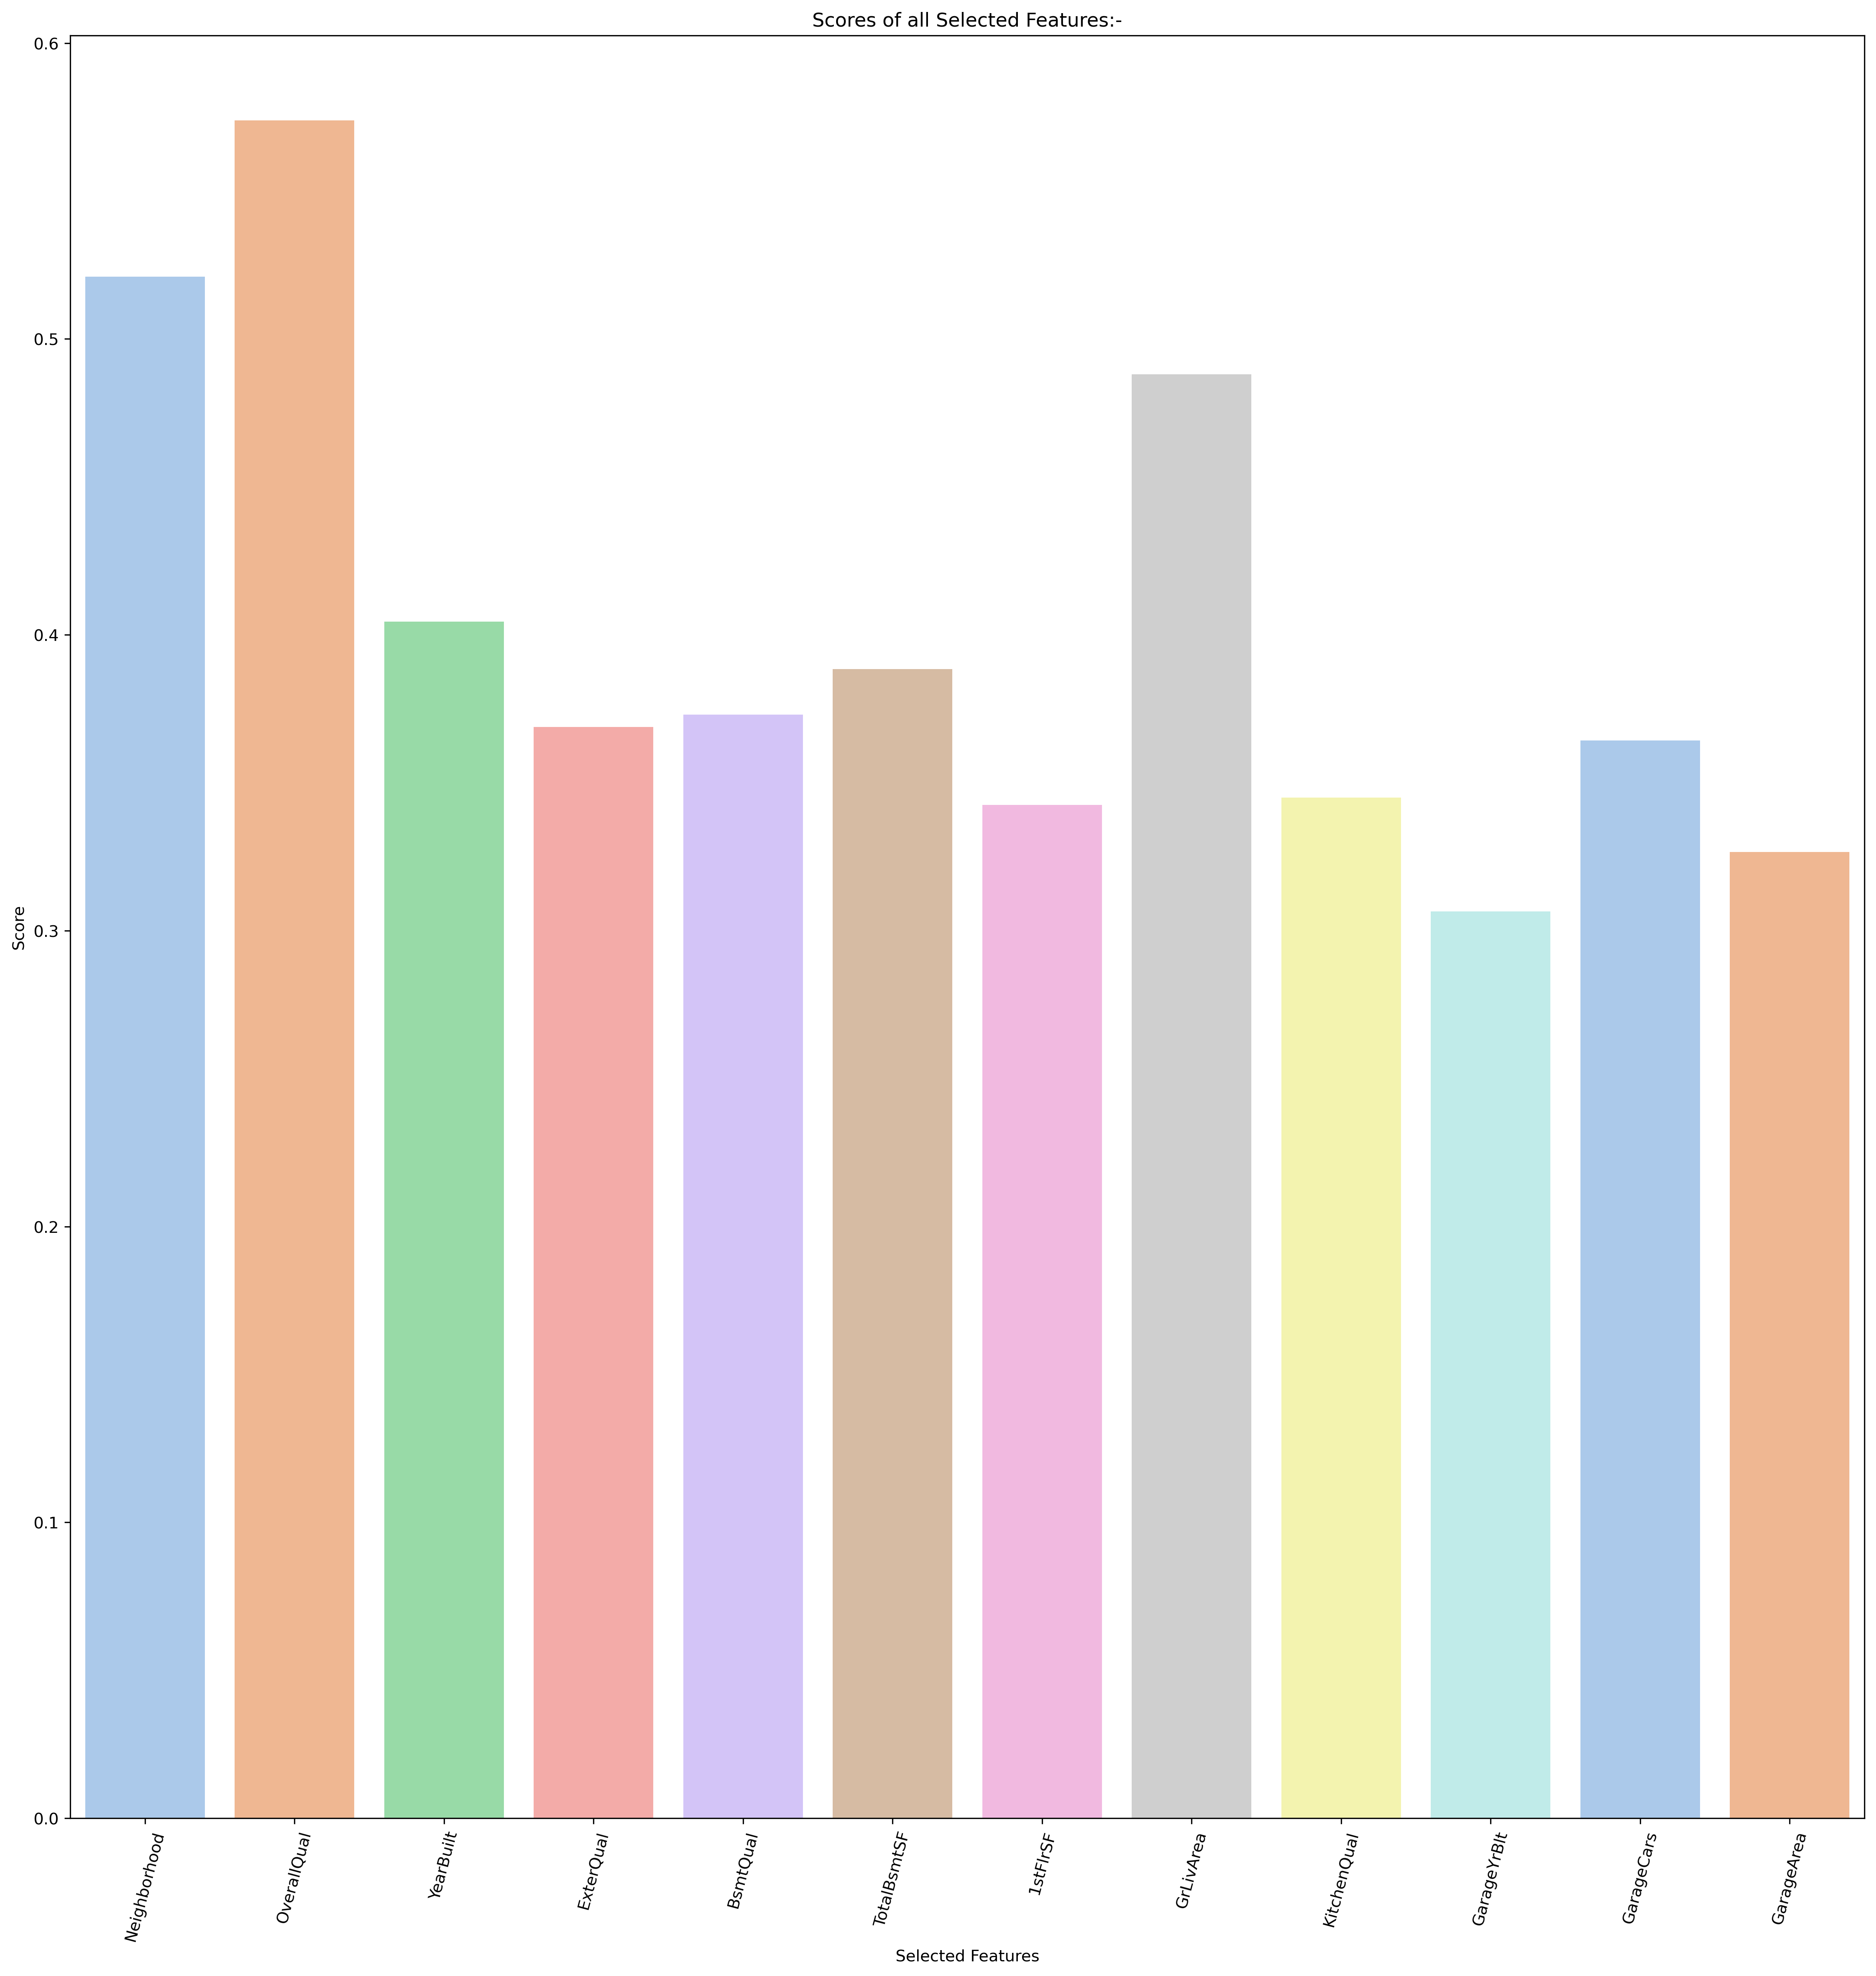

In [146]:
plt.figure(figsize=(20,20),dpi = 300)
sns.barplot(x=np.array(selected_feature_names),y=np.array(individual_scores),hue = np.array(selected_feature_names),palette="pastel")
plt.xlabel("Selected Features")
plt.ylabel("Score")
plt.title("Scores of all Selected Features:-")
plt.xticks(rotation=75)
plt.show()

<b>Part 3 : Linear Regression on the Housing Dataset</b>

In this assignment, you will perform linear regression on the Housing dataset to predict house prices. Follow the instructions below:

● Load the Housing dataset using the pandas library.
    
● Apply necessary preprocessing steps on the dataset, such as handling missing values and feature scaling if required.
    
● Separate the features (X) and the target variable (y: house prices) from the dataset.

● Split the dataset into training and testing sets using an 80:20 ratio.

● Fit a linear regression model to the training data using the LinearRegression class from the sklearn.linear_model module.

● Predict house prices for the testing data using the trained model.

● Evaluate the performance of the model by calculating the mean squared error (MSE) and the coefficient of determination (R^2) using appropriate functions from the sklearn.metrics module.

● Print the MSE and R^2 values to assess the model's accuracy.

● Plot a scatter plot between the predicted house prices and the actual house prices for the testing data using the matplotlib library.

● Provide necessary code comments and explanations throughout your code to enhance readability.
    
Bonus Task (optional):

Implement feature selection techniques, such as Mutual information regression,correlation etc to select the most relevant features for the linear regression model and evaluate its impact on the model's performance. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
housing_data = pd.read_csv("housing.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_data.shape

(1460, 81)

In [4]:
null_info = housing_data.isnull().sum()
null_info

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
columns_with_null_values=[]
for column in null_info.index:
    if null_info[column] > 0:
        columns_with_null_values.append(column)
columns_with_null_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
threshold = 0.4 # 40% in percentage
columns_to_be_dropped=[]
for column in columns_with_null_values:
    if housing_data[column].isnull().sum()/housing_data.shape[0] >= threshold:
        columns_to_be_dropped.append(column)
columns_to_be_dropped

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
housing_data.drop(columns_to_be_dropped,axis=1,inplace=True)
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [8]:
housing_data.dropna(inplace=True)
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [9]:
housing_data.drop("Id",axis=1,inplace=True) #Id column is not useful for understanding Trends in the SalePrice column
housing_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
categorical_columns = housing_data.select_dtypes(include=["object"]).columns
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
housing_data_copy = housing_data.copy()

le = LabelEncoder()

for column in categorical_columns:
    housing_data_copy[column] = le.fit_transform(housing_data_copy[column])

housing_data_copy = housing_data_copy.reset_index(drop=True)

housing_data_copy

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1090,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1091,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1092,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [12]:
housing_data = housing_data_copy

In [13]:
#To Handle constant columns
var_T = VarianceThreshold()
var_T.fit(housing_data)
var_T.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [14]:
housing_data.columns[var_T.get_support() == False]

Index(['Utilities'], dtype='object')

In [15]:
#Dropping the constant column "Utilities"
housing_data.drop("Utilities", axis = 1, inplace=True)
housing_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
  

In [16]:
target_variable_column = housing_data["SalePrice"]
feature_variable_columns = housing_data.drop("SalePrice",axis=1)

In [17]:
scaler = StandardScaler() 
feature_variable_columns_transformed = scaler.fit_transform(feature_variable_columns)
feature_variable_columns_transformed

array([[ 0.09226353, -0.04467096, -0.23510813, ...,  0.16037678,
         0.3361008 ,  0.1655266 ],
       [-0.86108993, -0.04467096,  0.37719538, ..., -0.58941894,
         0.3361008 ,  0.1655266 ],
       [ 0.09226353, -0.04467096, -0.11264743, ...,  0.16037678,
         0.3361008 ,  0.1655266 ],
       ...,
       [ 0.33060189, -0.04467096, -0.1942879 , ...,  1.65996821,
         0.3361008 ,  0.1655266 ],
       [-0.86108993, -0.04467096, -0.11264743, ...,  1.65996821,
         0.3361008 ,  0.1655266 ],
       [-0.86108993, -0.04467096,  0.17309421, ...,  0.16037678,
         0.3361008 ,  0.1655266 ]])

In [18]:
feature_variable_columns_transformed = pd.DataFrame(feature_variable_columns_transformed,columns=scaler.get_feature_names_out(feature_variable_columns.columns))
feature_variable_columns_transformed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.092264,-0.044671,-0.235108,-0.204952,0.060578,0.654613,0.30731,0.548418,-0.208465,-1.225682,...,0.216900,-0.358339,-0.110211,-0.282365,-0.0739,-0.140970,-1.609707,0.160377,0.336101,0.165527
1,-0.861090,-0.044671,0.377195,-0.064853,0.060578,0.654613,0.30731,-0.725402,-0.208465,1.910338,...,-0.724598,-0.358339,-0.110211,-0.282365,-0.0739,-0.140970,-0.495843,-0.589419,0.336101,0.165527
2,0.092264,-0.044671,-0.112647,0.136158,0.060578,-1.578693,0.30731,0.548418,-0.208465,-1.225682,...,-0.076354,-0.358339,-0.110211,-0.282365,-0.0739,-0.140970,0.989310,0.160377,0.336101,0.165527
3,0.330602,-0.044671,-0.439209,-0.070944,0.060578,-1.578693,0.30731,-1.999221,-0.208465,-1.060629,...,-0.184394,4.061381,-0.110211,-0.282365,-0.0739,-0.140970,-1.609707,-1.339215,0.336101,-3.568207
4,0.092264,-0.044671,0.540476,0.502851,0.060578,-1.578693,0.30731,-0.725402,-0.208465,0.424855,...,0.571891,-0.358339,-0.110211,-0.282365,-0.0739,-0.140970,2.103174,0.160377,0.336101,0.165527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.092264,-0.044671,-0.357569,-0.269885,0.060578,0.654613,0.30731,0.548418,-0.208465,-0.730521,...,-0.107222,-0.358339,-0.110211,-0.282365,-0.0739,-0.140970,0.618022,-0.589419,0.336101,0.165527
1090,-0.861090,-0.044671,0.581297,0.370671,0.060578,0.654613,0.30731,0.548418,-0.208465,0.259801,...,-0.724598,-0.358339,-0.110211,-0.282365,-0.0739,-0.140970,-1.609707,1.659968,0.336101,0.165527
1091,0.330602,-0.044671,-0.194288,-0.132831,0.060578,0.654613,0.30731,0.548418,-0.208465,-1.060629,...,0.201465,-0.358339,-0.110211,-0.282365,-0.0739,14.823818,-0.495843,1.659968,0.336101,0.165527
1092,-0.861090,-0.044671,-0.112647,-0.050600,0.060578,0.654613,0.30731,0.548418,-0.208465,-0.070306,...,-0.724598,1.461546,-0.110211,-0.282365,-0.0739,-0.140970,-0.867131,1.659968,0.336101,0.165527


In [32]:
X=feature_variable_columns_transformed
y=target_variable_column

In [33]:
xtrain, xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2) #for 80:20 split

In [34]:
xtrain.shape, ytrain.shape

((875, 72), (875,))

In [35]:
xtest.shape, ytest.shape

((219, 72), (219,))

In [36]:
linReg = LinearRegression()
#training model 
linReg.fit(xtrain, ytrain)

LinearRegression()

In [37]:
# For testing
ypred = linReg.predict(xtest)

In [38]:
#to check accuracy
r2_score(ypred,ytest)

0.8217007599970254

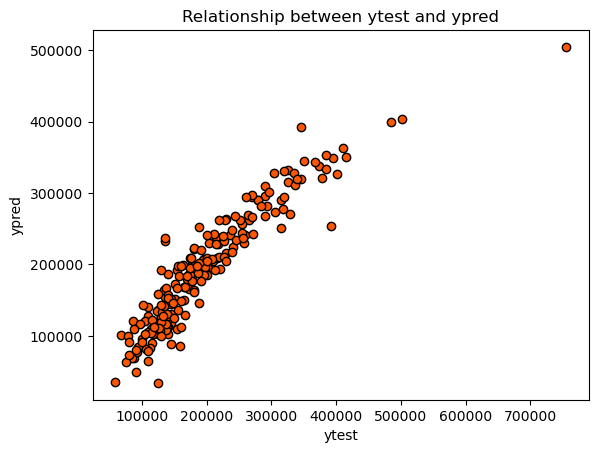

In [44]:
plt.scatter(ytest,ypred, c = '#fc5603',edgecolors='black')
plt.xlabel("ytest")
plt.ylabel("ypred")
plt.title("Relationship between ytest and ypred")
plt.show()

### Implement feature selection techniques, such as Mutual information regression,correlation etc to select the most relevant features for the linear regression model and evaluate its impact on the model's performance.

In [45]:
#this was the dataset after handling all the null values, constant columns and categorical data encoding:-
housing_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,60,3,62.0,7917,1,3,3,4,0,8,...,0,0,0,0,0,8,2007,8,4,175000
1090,20,3,85.0,13175,1,3,3,4,0,14,...,0,0,0,0,0,2,2010,8,4,210000
1091,70,3,66.0,9042,1,3,3,4,0,6,...,0,0,0,0,2500,5,2010,8,4,266500
1092,20,3,68.0,9717,1,3,3,4,0,12,...,112,0,0,0,0,4,2010,8,4,142125


In [46]:
target_variable_column = housing_data["SalePrice"]
feature_variable_columns = housing_data.drop("SalePrice",axis=1)

In [47]:
features_corr = feature_variable_columns.corr()
features_corr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,0.030073,-0.389466,-0.197903,0.023287,0.085810,0.013368,0.065471,-0.039652,-0.022046,...,0.006799,-0.019313,-0.035855,-0.021854,0.003221,-0.043299,-0.025393,-0.012347,-0.003957,-0.022491
MSZoning,0.030073,1.000000,-0.097289,-0.035731,0.118349,0.055222,-0.021917,-0.027070,-0.026999,-0.255439,...,-0.151000,0.162372,0.002282,0.021552,-0.003301,0.015245,-0.020595,-0.030517,0.111368,-0.001727
LotFrontage,-0.389466,-0.097289,1.000000,0.419714,-0.038923,-0.163392,-0.077012,-0.196166,0.080208,0.087416,...,0.160862,0.016058,0.073004,0.034937,0.211959,0.000789,0.014951,0.013366,-0.026790,0.050027
LotArea,-0.197903,-0.035731,0.419714,1.000000,-0.054958,-0.162483,-0.137701,-0.077400,0.315375,0.087526,...,0.098051,-0.022789,0.013343,0.072413,0.109294,0.012483,0.006270,-0.006412,0.011657,0.056401
Street,0.023287,0.118349,-0.038923,-0.054958,1.000000,-0.017107,0.131767,0.005361,-0.179254,-0.000740,...,-0.022256,0.021708,0.006676,-0.051064,0.004477,-0.047122,0.007545,-0.043781,0.028487,0.018246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.043299,0.015245,0.000789,0.012483,-0.047122,0.027761,0.031508,-0.005630,-0.018896,-0.017427,...,0.029288,0.029621,0.025811,0.170486,0.129147,1.000000,0.016856,0.039380,0.000789,0.001945
MoSold,-0.025393,-0.020595,0.014951,0.006270,0.007545,-0.058686,0.015168,0.026806,0.009868,0.022276,...,0.093457,-0.059815,0.023724,0.013459,-0.055290,0.016856,1.000000,-0.152046,-0.044177,0.054197
YrSold,-0.012347,-0.030517,0.013366,-0.006412,-0.043781,0.048080,0.016827,-0.033825,0.016066,0.053583,...,-0.047924,-0.003481,0.025444,-0.002140,-0.054050,0.039380,-0.152046,1.000000,0.034963,-0.006714
SaleType,-0.003957,0.111368,-0.026790,0.011657,0.028487,-0.010195,-0.038044,0.004205,0.045162,-0.040896,...,-0.005563,0.019030,-0.023112,0.035805,0.010928,0.000789,-0.044177,0.034963,1.000000,0.143611


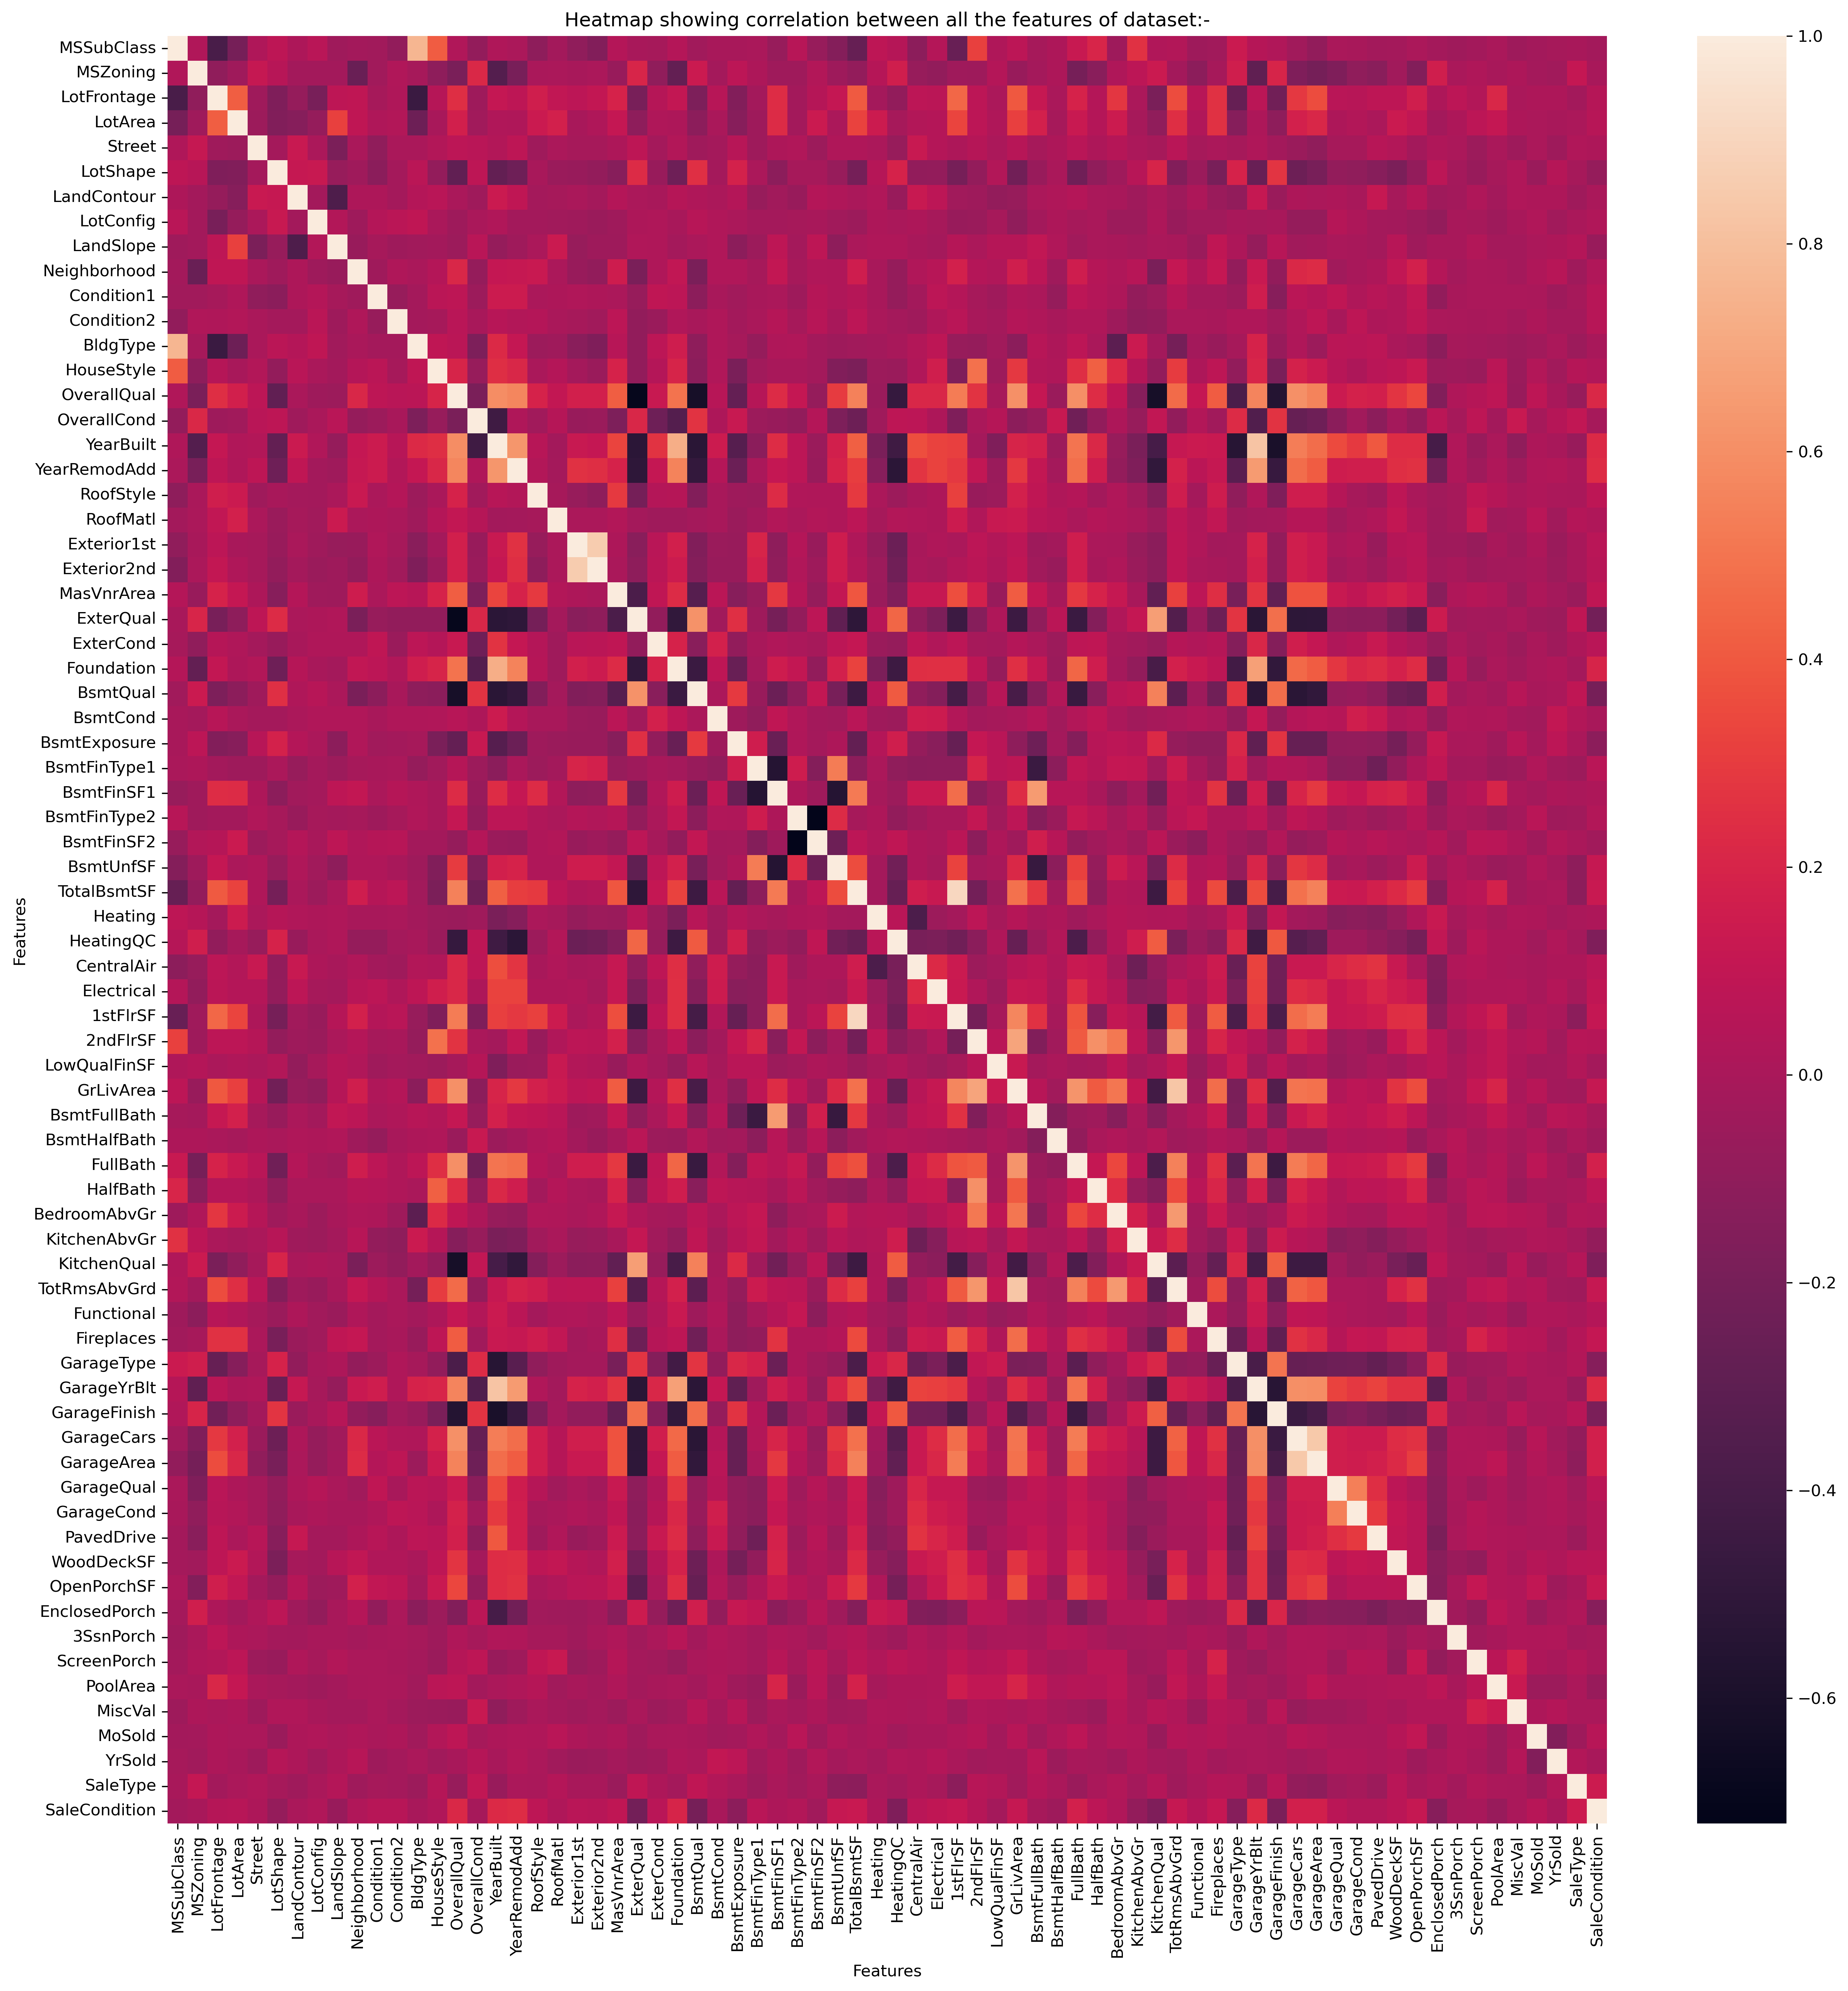

In [48]:
plt.figure(figsize=(20,20),dpi = 300)
sns.heatmap(features_corr)
plt.title("Heatmap showing correlation between all the features of dataset:-")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [49]:
threshold = 0.5
highly_correlated_columns = set()
for i in range(len(features_corr)):
    for j in range(i):
        if abs(features_corr[features_corr.columns[i]][features_corr.columns[j]]) > threshold:
            col = features_corr.columns[max(i,j)]
            highly_correlated_columns.add(col)
            break
print(highly_correlated_columns)
print(len(highly_correlated_columns))

{'GarageCond', 'BsmtQual', 'Exterior2nd', 'GarageFinish', 'TotRmsAbvGrd', 'BsmtUnfSF', 'GrLivArea', 'HalfBath', '1stFlrSF', 'BsmtFinSF2', 'GarageYrBlt', 'KitchenQual', 'YearRemodAdd', 'GarageCars', 'BedroomAbvGr', 'GarageArea', 'FullBath', 'ExterQual', 'BsmtFinSF1', 'BsmtFullBath', 'YearBuilt', 'Foundation', 'BldgType', 'GarageType', 'HeatingQC', 'TotalBsmtSF'}
26


In [50]:
feature_variable_columns.drop(highly_correlated_columns,axis=1,inplace=True)
feature_variable_columns

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,2,0,24,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,4,0,5,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,6,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,2,0,15,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,60,3,62.0,7917,1,3,3,4,0,8,...,40,0,0,0,0,0,8,2007,8,4
1090,20,3,85.0,13175,1,3,3,4,0,14,...,0,0,0,0,0,0,2,2010,8,4
1091,70,3,66.0,9042,1,3,3,4,0,6,...,60,0,0,0,0,2500,5,2010,8,4
1092,20,3,68.0,9717,1,3,3,4,0,12,...,0,112,0,0,0,0,4,2010,8,4


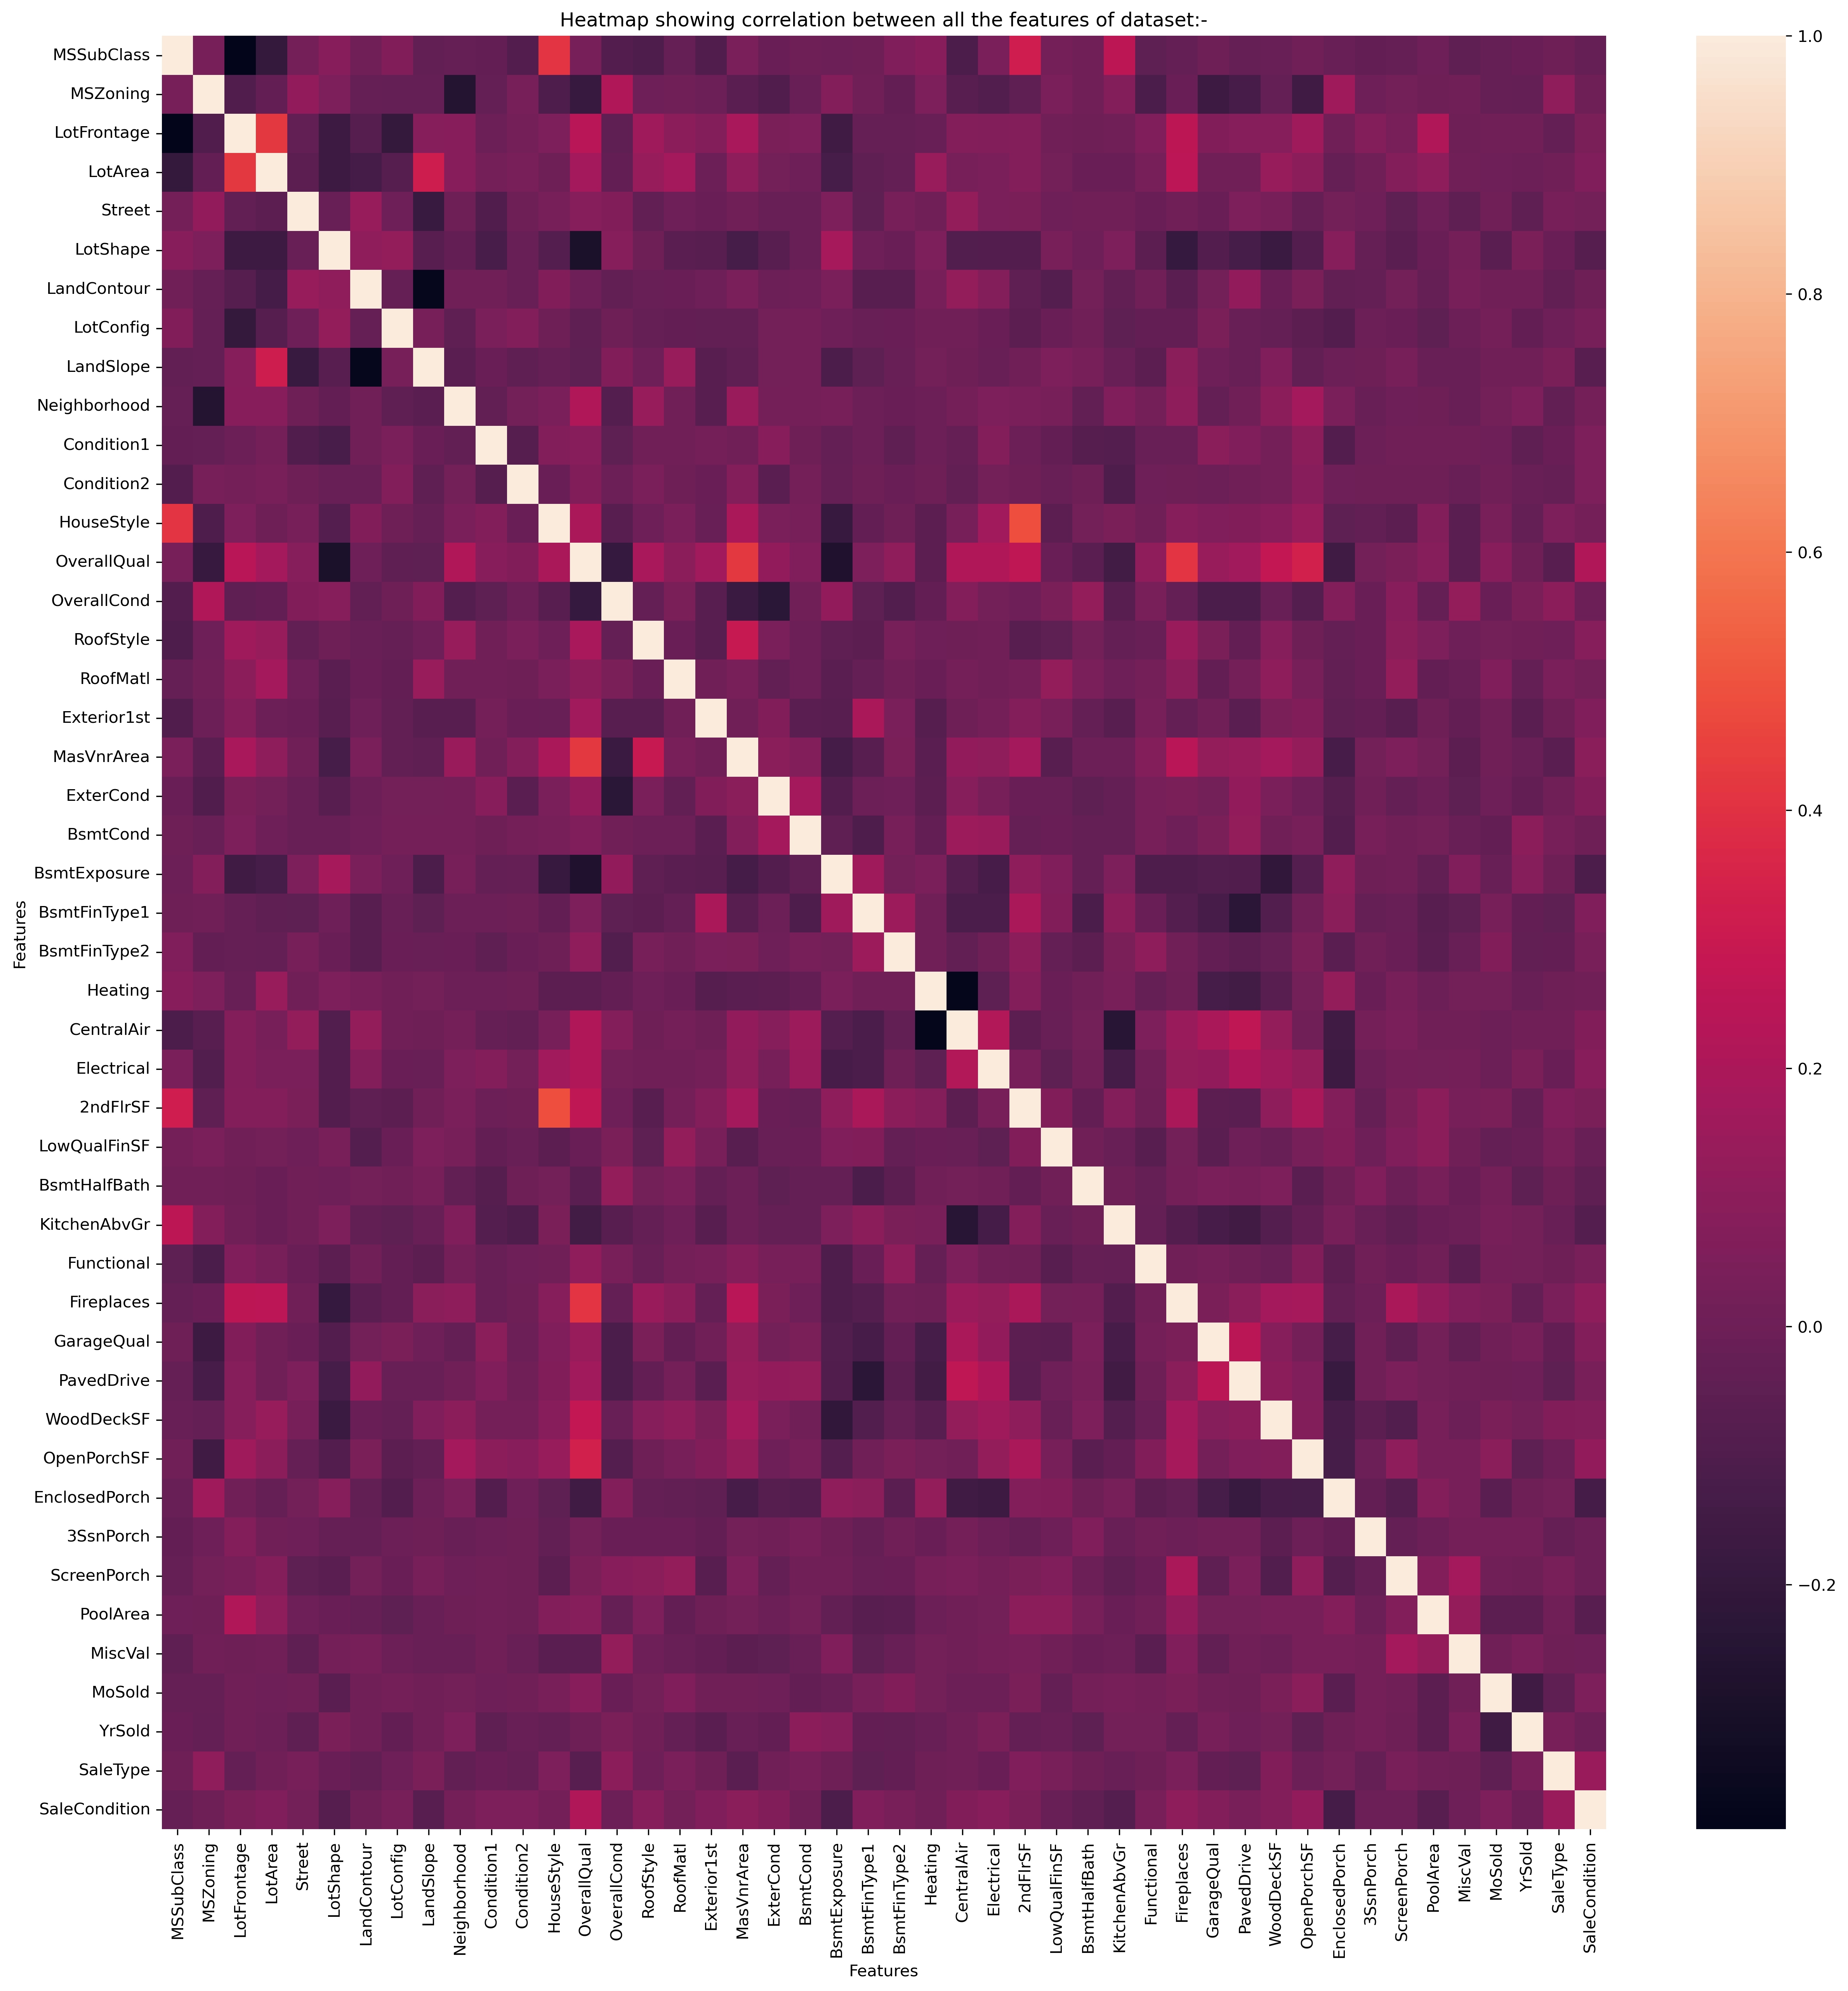

In [51]:
features_corr = feature_variable_columns.corr()
plt.figure(figsize=(20,20),dpi = 300)
sns.heatmap(features_corr)
plt.title("Heatmap showing correlation between all the features of dataset:-")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [237]:
X=feature_variable_columns
y=target_variable_column

In [238]:
MIR = mutual_info_regression(X,y)
MIR

array([2.72892040e-01, 1.45304975e-01, 2.27561741e-01, 1.92686826e-01,
       1.12130131e-02, 8.01854150e-02, 3.31944171e-02, 3.26196290e-02,
       6.87784799e-03, 5.22194847e-01, 4.82623861e-04, 1.06662052e-02,
       8.39358418e-02, 5.94054997e-01, 1.38549733e-01, 1.58115208e-02,
       0.00000000e+00, 1.70915966e-01, 8.43030573e-02, 7.64526208e-03,
       2.01128654e-02, 8.83597125e-02, 1.59593157e-01, 1.48943421e-02,
       0.00000000e+00, 5.58464965e-02, 6.12896491e-02, 1.96906178e-01,
       0.00000000e+00, 2.15835608e-02, 2.52336089e-02, 3.11320246e-03,
       1.70101528e-01, 3.57976412e-02, 3.16642986e-02, 1.06188533e-01,
       1.97850754e-01, 2.30411177e-02, 8.24238743e-03, 9.00596315e-03,
       0.00000000e+00, 0.00000000e+00, 2.02413782e-02, 0.00000000e+00,
       1.15334452e-01, 9.58350912e-02])

In [239]:
Mir_ser = pd.Series(MIR)

In [240]:
Mir_ser.index = X.columns
Mir_ser

MSSubClass       0.272892
MSZoning         0.145305
LotFrontage      0.227562
LotArea          0.192687
Street           0.011213
LotShape         0.080185
LandContour      0.033194
LotConfig        0.032620
LandSlope        0.006878
Neighborhood     0.522195
Condition1       0.000483
Condition2       0.010666
HouseStyle       0.083936
OverallQual      0.594055
OverallCond      0.138550
RoofStyle        0.015812
RoofMatl         0.000000
Exterior1st      0.170916
MasVnrArea       0.084303
ExterCond        0.007645
BsmtCond         0.020113
BsmtExposure     0.088360
BsmtFinType1     0.159593
BsmtFinType2     0.014894
Heating          0.000000
CentralAir       0.055846
Electrical       0.061290
2ndFlrSF         0.196906
LowQualFinSF     0.000000
BsmtHalfBath     0.021584
KitchenAbvGr     0.025234
Functional       0.003113
Fireplaces       0.170102
GarageQual       0.035798
PavedDrive       0.031664
WoodDeckSF       0.106189
OpenPorchSF      0.197851
EnclosedPorch    0.023041
3SsnPorch   

In [241]:
Mir_ser = Mir_ser.sort_values(ascending=False)
Mir_ser

OverallQual      0.594055
Neighborhood     0.522195
MSSubClass       0.272892
LotFrontage      0.227562
OpenPorchSF      0.197851
2ndFlrSF         0.196906
LotArea          0.192687
Exterior1st      0.170916
Fireplaces       0.170102
BsmtFinType1     0.159593
MSZoning         0.145305
OverallCond      0.138550
SaleType         0.115334
WoodDeckSF       0.106189
SaleCondition    0.095835
BsmtExposure     0.088360
MasVnrArea       0.084303
HouseStyle       0.083936
LotShape         0.080185
Electrical       0.061290
CentralAir       0.055846
GarageQual       0.035798
LandContour      0.033194
LotConfig        0.032620
PavedDrive       0.031664
KitchenAbvGr     0.025234
EnclosedPorch    0.023041
BsmtHalfBath     0.021584
MoSold           0.020241
BsmtCond         0.020113
RoofStyle        0.015812
BsmtFinType2     0.014894
Street           0.011213
Condition2       0.010666
ScreenPorch      0.009006
3SsnPorch        0.008242
ExterCond        0.007645
LandSlope        0.006878
Functional  

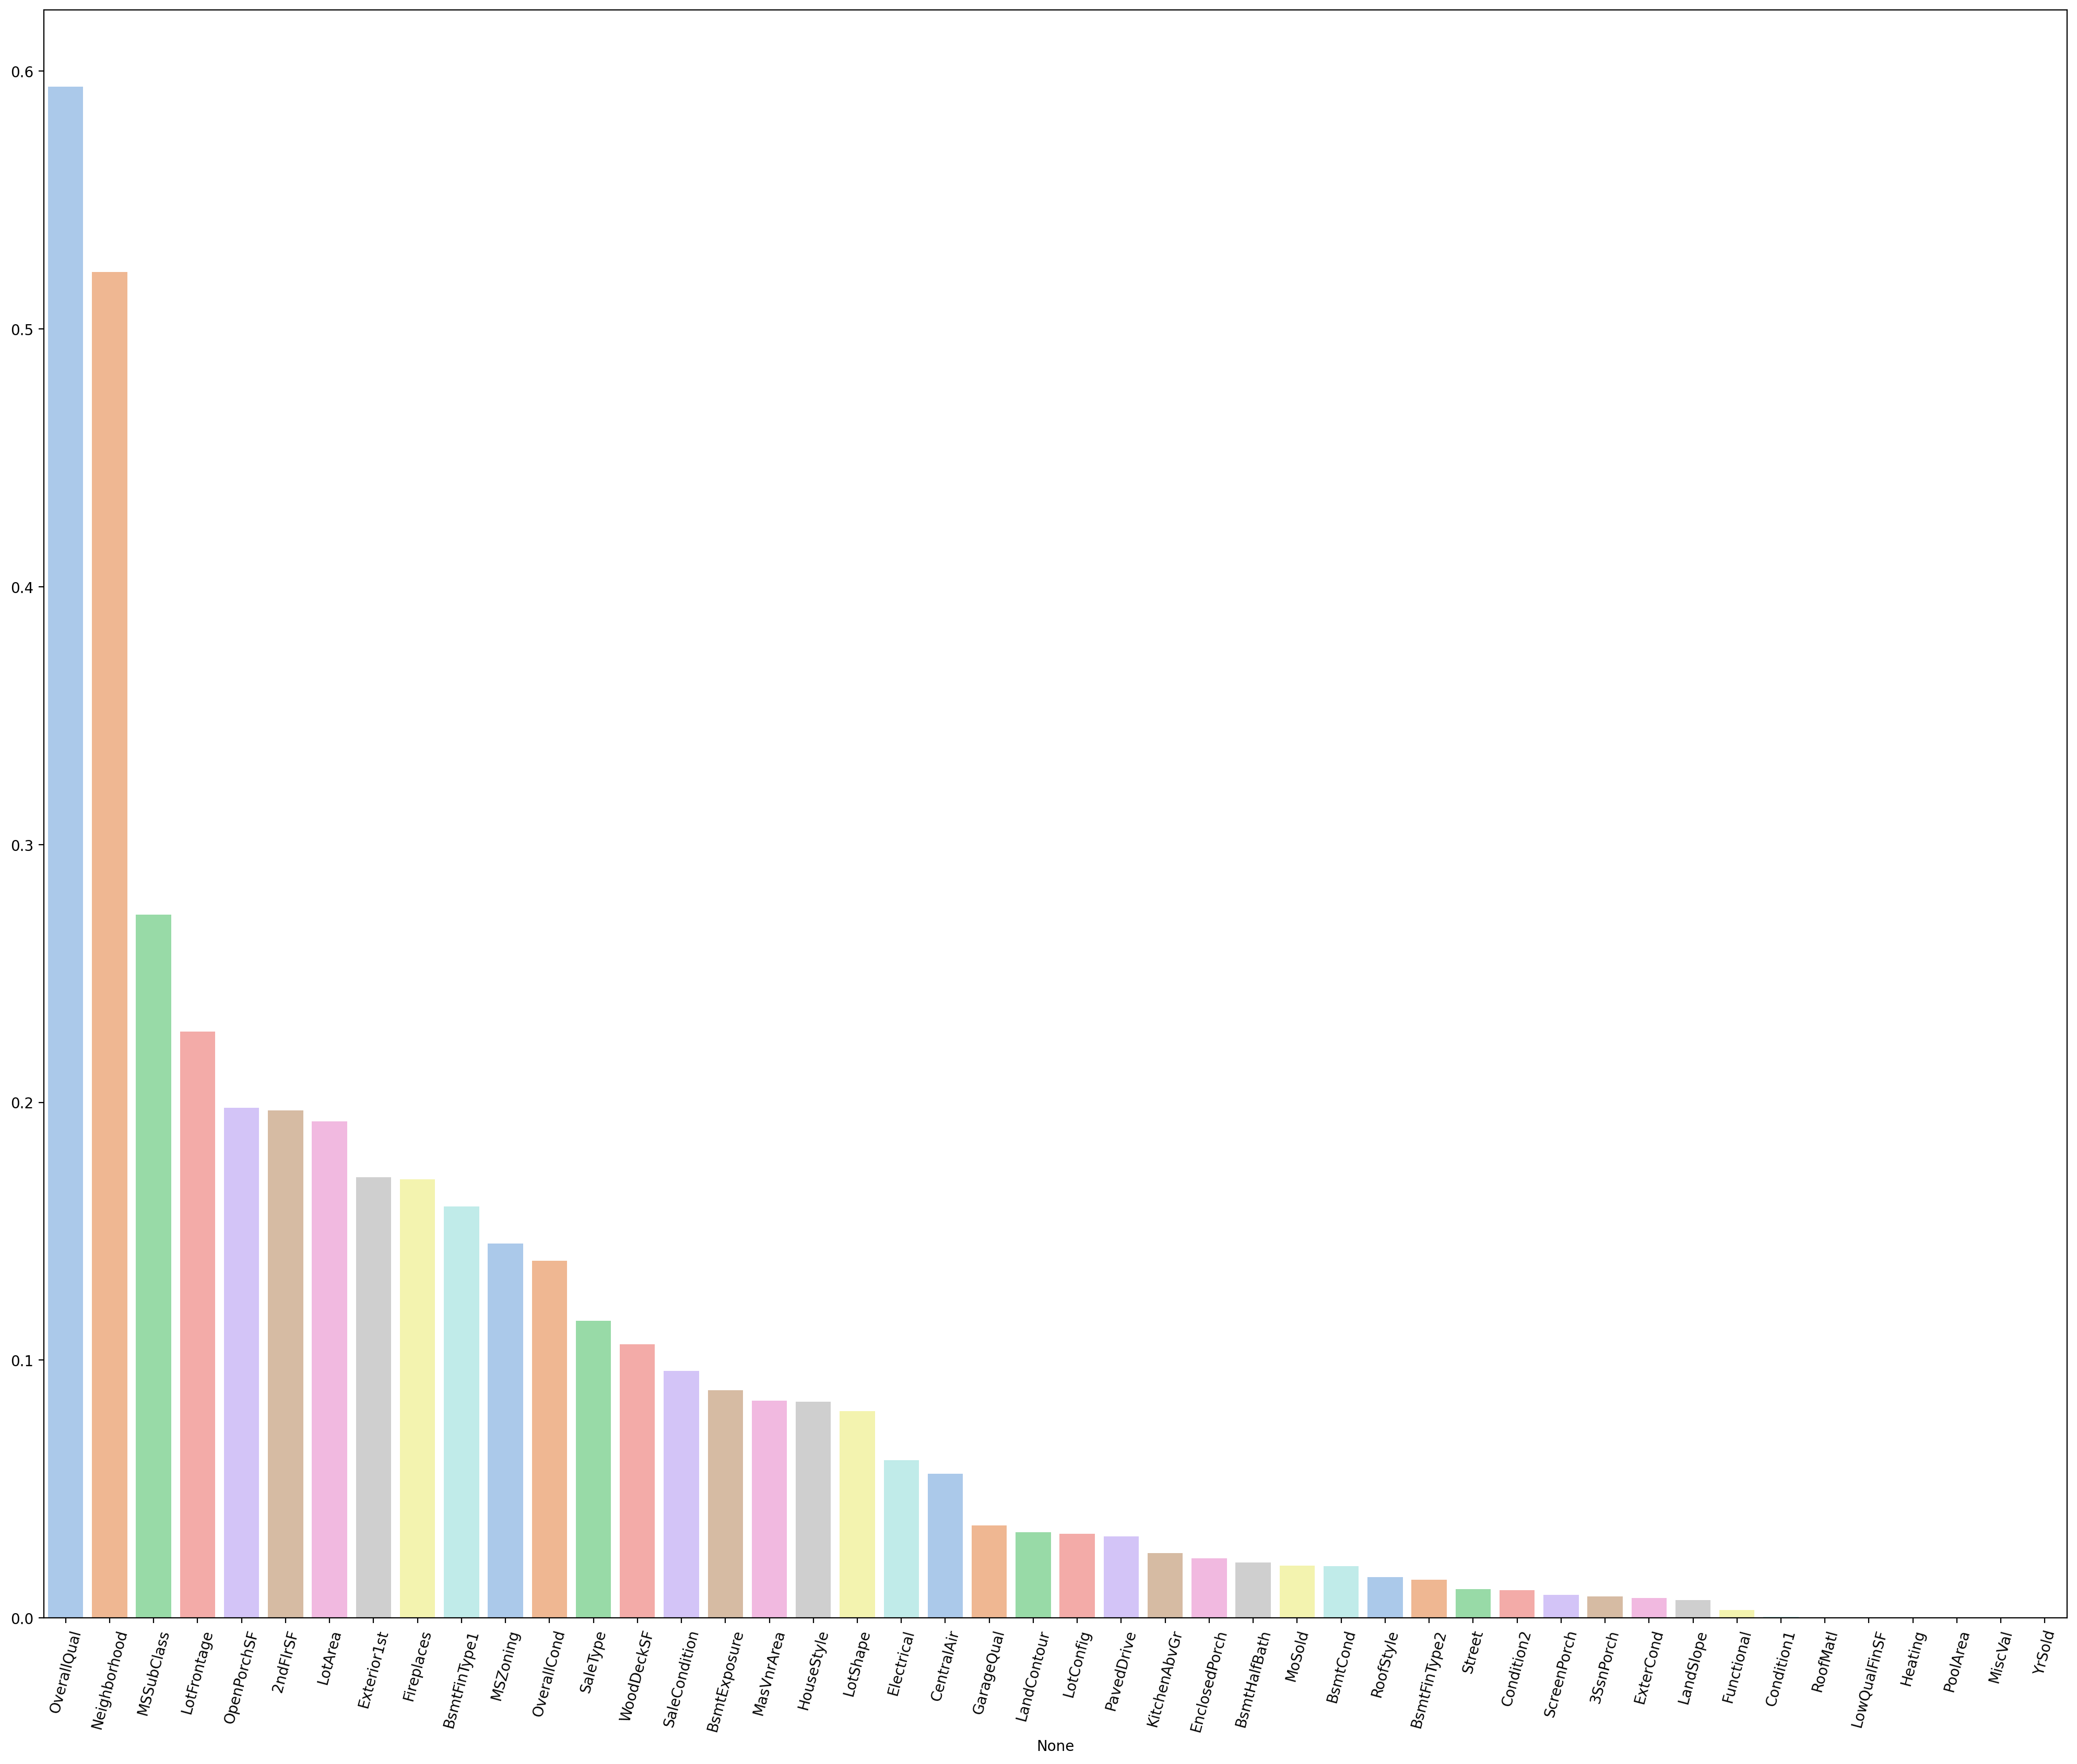

In [242]:
plt.figure(figsize=(25,20),dpi = 200)
sns.barplot(x = Mir_ser.index, y = Mir_ser.values, hue = Mir_ser.index, palette="pastel")
plt.xticks(rotation = 75)
plt.show()

In [243]:
X = X[["OverallQual",
       "Neighborhood",
       "MSSubClass",
       "LotFrontage",
       "2ndFlrSF",
       "LotArea",
       "OpenPorchSF",
       "Exterior1st",
       "OverallCond",
       "Fireplaces",
       "BsmtFinType1",
       "MSZoning",
       "SaleType",
       "WoodDeckSF",
       "SaleCondition",
       "MasVnrArea",
       "LotShape",
       "BsmtExposure"]]
X

,OverallQual,Neighborhood,MSSubClass,LotFrontage,2ndFlrSF,LotArea,OpenPorchSF,Exterior1st,OverallCond,Fireplaces,BsmtFinType1,MSZoning,SaleType,WoodDeckSF,SaleCondition,MasVnrArea,LotShape,BsmtExposure
0,7,5,60,65.0,854,8450,61,11,5,0,2,3,8,0,4,196.0,3,3
1,6,24,20,80.0,0,9600,0,7,8,1,0,3,8,298,4,0.0,3,1
2,7,5,60,68.0,866,11250,42,11,5,1,2,3,8,0,4,162.0,0,2
3,7,6,70,60.0,756,9550,35,12,5,1,0,3,8,0,0,0.0,0,3
4,8,15,60,84.0,1053,14260,84,11,5,1,2,3,8,192,4,350.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,6,8,60,62.0,694,7917,40,11,5,1,5,3,8,0,4,0.0,3,3
1090,6,14,20,85.0,0,13175,0,8,6,2,0,3,8,349,4,119.0,3,3
1091,7,6,70,66.0,1152,9042,60,4,9,2,2,3,8,0,4,0.0,3,3
1092,5,12,20,68.0,0,9717,0,7,6,0,2,3,8,366,4,0.0,3,2


In [244]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1089    175000
1090    210000
1091    266500
1092    142125
1093    147500
Name: SalePrice, Length: 1094, dtype: int64

In [245]:
scaler = StandardScaler() 
X_transformed = scaler.fit_transform(X)
X_transformed

array([[ 0.55065198, -1.22568227,  0.09226353, ...,  0.45201118,
         0.65461325,  0.63900623],
       [-0.1813204 ,  1.91033837, -0.86108993, ..., -0.57642672,
         0.65461325, -1.09782064],
       [ 0.55065198, -1.22568227,  0.09226353, ...,  0.27360868,
        -1.57869308, -0.2294072 ],
       ...,
       [ 0.55065198, -1.06062855,  0.33060189, ..., -0.57642672,
         0.65461325,  0.63900623],
       [-0.91329278, -0.07030625, -0.86108993, ..., -0.57642672,
         0.65461325, -0.2294072 ],
       [-0.91329278, -0.89557484, -0.86108993, ..., -0.57642672,
         0.65461325,  0.63900623]])

In [246]:
X = pd.DataFrame(X_transformed,columns=scaler.get_feature_names_out(X.columns))
X

,OverallQual,Neighborhood,MSSubClass,LotFrontage,2ndFlrSF,LotArea,OpenPorchSF,Exterior1st,OverallCond,Fireplaces,BsmtFinType1,MSZoning,SaleType,WoodDeckSF,SaleCondition,MasVnrArea,LotShape,BsmtExposure
0,0.550652,-1.225682,0.092264,-0.235108,1.133021,-0.204952,0.216900,0.714190,-0.540208,-0.964879,-0.434537,-0.044671,0.336101,-0.769707,0.165527,0.452011,0.654613,0.639006
1,-0.181320,1.910338,-0.861090,0.377195,-0.812046,-0.064853,-0.724598,-0.570354,2.274018,0.615327,-1.532421,-0.044671,0.336101,1.661585,0.165527,-0.576427,0.654613,-1.097821
2,0.550652,-1.225682,0.092264,-0.112647,1.160352,0.136158,-0.076354,0.714190,-0.540208,0.615327,-0.434537,-0.044671,0.336101,-0.769707,0.165527,0.273609,-1.578693,-0.229407
3,0.550652,-1.060629,0.330602,-0.439209,0.909817,-0.070944,-0.184394,1.035326,-0.540208,0.615327,-1.532421,-0.044671,0.336101,-0.769707,-3.568207,-0.576427,-1.578693,0.639006
4,1.282624,0.424855,0.092264,0.540476,1.586263,0.502851,0.571891,0.714190,-0.540208,0.615327,-0.434537,-0.044671,0.336101,0.796763,0.165527,1.260070,-1.578693,-1.966234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,-0.181320,-0.730521,0.092264,-0.357569,0.768606,-0.269885,-0.107222,0.714190,-0.540208,0.615327,1.212289,-0.044671,0.336101,-0.769707,0.165527,-0.576427,0.654613,0.639006
1090,-0.181320,0.259801,-0.861090,0.581297,-0.812046,0.370671,-0.724598,-0.249218,0.397867,2.195533,-1.532421,-0.044671,0.336101,2.077679,0.165527,0.047982,0.654613,0.639006
1091,0.550652,-1.060629,0.330602,-0.194288,1.811745,-0.132831,0.201465,-1.533763,3.212093,2.195533,-0.434537,-0.044671,0.336101,-0.769707,0.165527,-0.576427,0.654613,0.639006
1092,-0.913293,-0.070306,-0.861090,-0.112647,-0.812046,-0.050600,-0.724598,-0.570354,0.397867,-0.964879,-0.434537,-0.044671,0.336101,2.216377,0.165527,-0.576427,0.654613,-0.229407


In [319]:
xtrain, xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2) 

In [320]:
xtrain.shape, ytrain.shape

((875, 18), (875,))

In [321]:
xtest.shape, ytest.shape

((219, 18), (219,))

In [322]:
linReg = LinearRegression()

In [323]:
# for training model
linReg.fit(xtrain, ytrain)

LinearRegression()

In [324]:
# for testing
ypred = linReg.predict(xtest)

In [325]:
r2_score(ypred,ytest)

0.7312015744546889

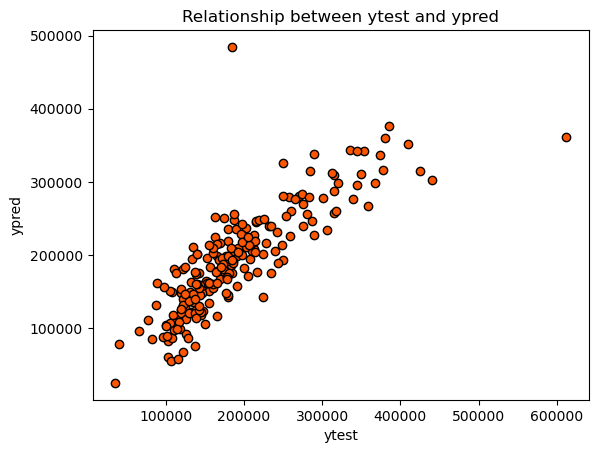

In [318]:
plt.scatter(ytest,ypred, c = '#fc5603',edgecolors='black')
plt.xlabel("ytest")
plt.ylabel("ypred")
plt.title("Relationship between ytest and ypred")
plt.show()